<a href="https://colab.research.google.com/github/dcsgod/datascience/blob/main/NUMRECOGUSINGMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NUMBER RECOGNISATION USING MNIST DATASET (BHARAT INTERN TASK 3)**

In [1]:
#IMPORTING THE LIBRARY
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Preprocess the data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]


In [5]:
# Create the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10)


Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.2163 - accuracy: 0.9358 - val_loss: 0.1066 - val_accuracy: 0.9677
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0783 - accuracy: 0.9760 - val_loss: 0.0750 - val_accuracy: 0.9757
Epoch 3/10
469/469 [==============================] - 13s 28ms/step - loss: 0.0506 - accuracy: 0.9844 - val_loss: 0.0638 - val_accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0726 - val_accuracy: 0.9780
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0732 - val_accuracy: 0.9792
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0737 - val_accuracy: 0.9797
Epoch 7/10
469/469 [==============================] - 9s 20ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0720 - val_accuracy: 0

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


313/313 [==============================] - 2s 6ms/step - loss: 0.0764 - accuracy: 0.9815
Test Loss: 0.0764
Test Accuracy: 0.9815


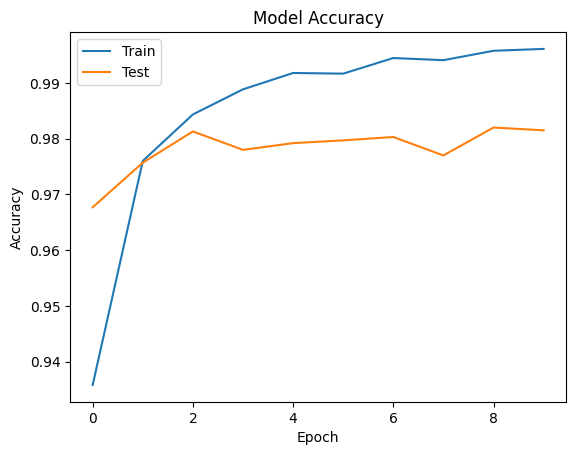

In [8]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()